In [2]:
# Setup
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam , RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16, ResNet152
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import zipfile

# Dataset
def download_and_unzip_data():
    """Downloads and unzips the cats vs dogs subset."""
    url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
    response = requests.get(url, stream=True)
    with open("cats_and_dogs_filtered.zip", "wb") as f:
        f.write(response.content)

    with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
        zip_ref.extractall()
    print("Dataset downloaded and extracted.")

download_and_unzip_data()

base_dir = 'cats_and_dogs_filtered'
# Subset of this data to simulate a ~100 image dataset
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Data Augmentation and Normalization
# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Batch size of 20 and 5 steps per epoch. 20 * 5 = 100 images.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Function for plotting result
def plot_history(history, title):
    """Plots training and validation accuracy and loss."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.suptitle(title, fontsize=16)
    plt.show()

Dataset downloaded and extracted.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


--- Training a model designed to have VANISHING gradients ---
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.4636 - loss: 188.2139 - val_accuracy: 0.4750 - val_loss: 7.3177
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4765 - loss: 16.2325 - val_accuracy: 0.5375 - val_loss: 19.7810
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.5622 - loss: 11.1518 - val_accuracy: 0.4625 - val_loss: 5.2953
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.4303 - loss: 7.4218 - val_accuracy: 0.5250 - val_loss: 7.4966
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.5779 - loss: 4.2224 - val_accuracy: 0.4875 - val_loss: 4.9335
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.5586 - loss: 3.2989 - val_accuracy: 0.5125 - val_loss: 3.6595
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5422 - loss: 2.3858 - val_accuracy: 0.5000 - val_loss: 3.8262
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.4776 - loss: 3.0215 - val_accuracy: 0.5250 - val_loss: 1.704

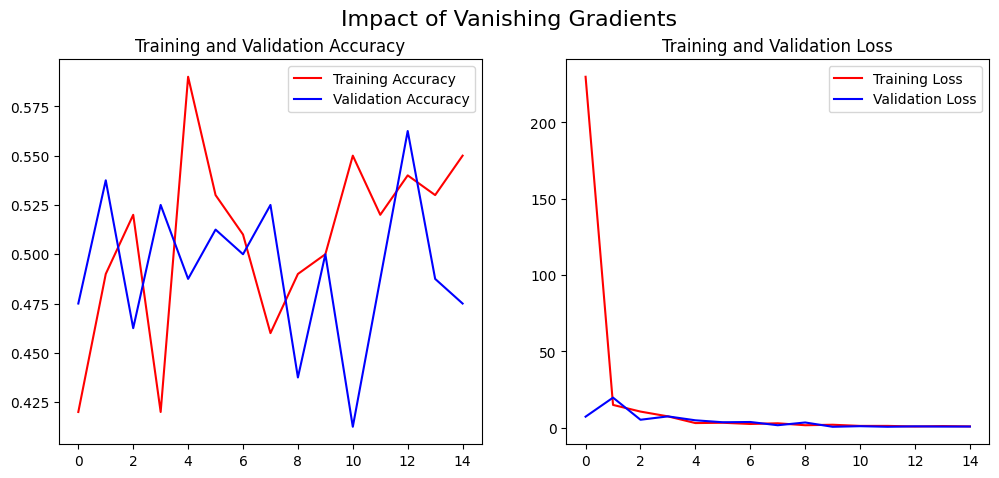


--- Training a model designed to have EXPLODING gradients ---
Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.5083 - loss: 55794462720.0000 - val_accuracy: 0.4625 - val_loss: 16.3993
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5929 - loss: 7.9100 - val_accuracy: 0.3750 - val_loss: 28.7680
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4821 - loss: 16.2735 - val_accuracy: 0.5625 - val_loss: 5.5096
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5232 - loss: 10.2563 - val_accuracy: 0.5250 - val_loss: 13.1070
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4965 - loss: 12.8219 - val_accuracy: 0.5000 - val_loss: 7.2742
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5419 - loss: 9.6884 - val_accuracy: 0.4000 - val_loss: 18.2708
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5369 - loss: 11.6371 - val_accuracy: 0.4375 - val_loss: 22.0047
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64m

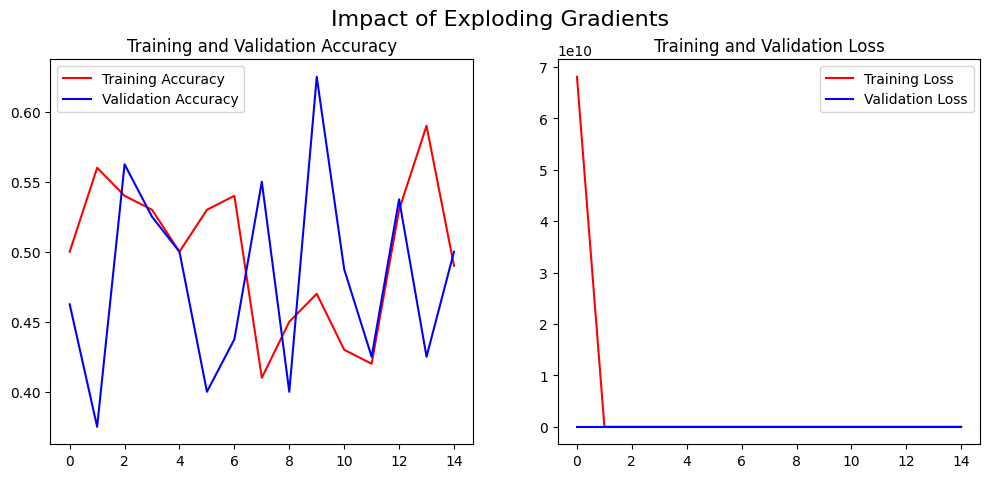

In [3]:
# Vanishing and Exploding Gradients

# Demonstrating Vanishing Gradients
# Deep network with 'sigmoid' activations.
model_vanishing = Sequential([
    Input(shape=(150, 150, 3))
])
# 20 dense layers with sigmoid activation
for _ in range(20):
    model_vanishing.add(Dense(50, activation='sigmoid'))

# Flatten and add the final output layer
model_vanishing.add(Flatten())
model_vanishing.add(Dense(1, activation='sigmoid'))

model_vanishing.compile(optimizer=SGD(learning_rate=0.01),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

print("--- Training a model designed to have VANISHING gradients ---")
# The accuracy will barely improve, showing the model isn't learning.
history_vanishing = model_vanishing.fit(
    train_generator,
    steps_per_epoch=5,  # 5 * 20 = 100 images
    epochs=15,
    validation_data=validation_generator,
    validation_steps=4, # 4 * 20 = 80 images
    verbose=1
)
plot_history(history_vanishing, "Impact of Vanishing Gradients")


# Demonstrating Exploding Gradients
# We use a standard architecture but with a massive learning rate.
model_exploding = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Extremely high learning rate
exploding_optimizer = SGD(learning_rate=100.0)

model_exploding.compile(optimizer=exploding_optimizer,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

print("\n--- Training a model designed to have EXPLODING gradients ---")
# The loss will likely become 'NaN' immediately.
history_exploding = model_exploding.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
# Note: Plotting might fail if loss is NaN, but the console output proves the point.
# We add a check to avoid errors.
if not np.isnan(history_exploding.history['loss']).all():
    plot_history(history_exploding, "Impact of Exploding Gradients")
else:
    print("\nExploding gradients caused loss to become NaN, as expected.")


--- Training a model WITHOUT regularization (prone to overfitting) ---
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.4943 - loss: 9.0255 - val_accuracy: 0.5500 - val_loss: 3.0766
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5189 - loss: 1.7388 - val_accuracy: 0.5375 - val_loss: 0.7501
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5411 - loss: 0.7056 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4771 - loss: 0.6943 - val_accuracy: 0.6625 - val_loss: 0.6816
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5893 - loss: 0.6936 - val_accuracy: 0.5875 - val_loss: 0.6893
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5475 - loss: 0.6845 - val_accuracy: 0.5125 - val_loss: 0.6853
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5065 - loss: 0.7054 - val_accuracy: 0.4250 - val_loss: 0.7041
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - a

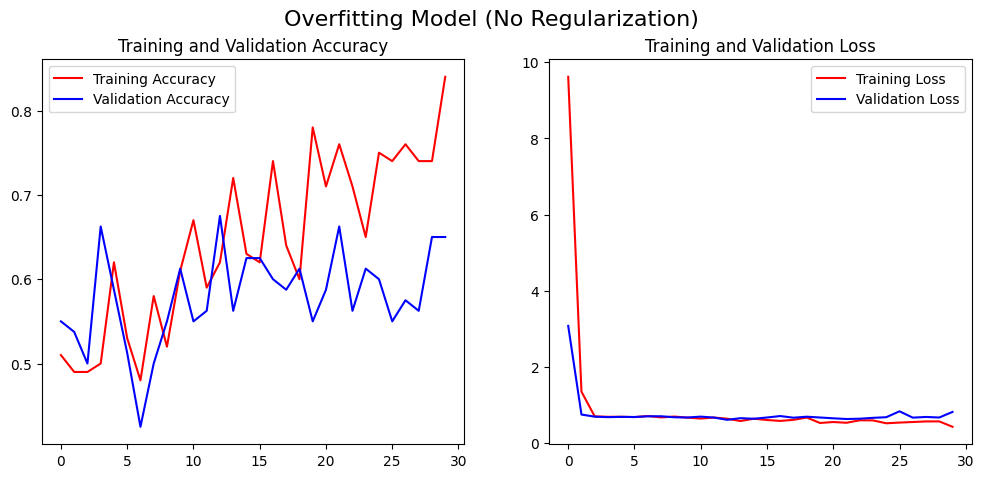


--- Training the same model WITH L2 and Dropout Regularization ---
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.5606 - loss: 3.2624 - val_accuracy: 0.5125 - val_loss: 1.3413
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4883 - loss: 1.4548 - val_accuracy: 0.5000 - val_loss: 1.3260
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5390 - loss: 1.3331 - val_accuracy: 0.5375 - val_loss: 1.3347
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5617 - loss: 1.3469 - val_accuracy: 0.5750 - val_loss: 1.2741
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5362 - loss: 1.2688 - val_accuracy: 0.5375 - val_loss: 1.2307
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4940 - loss: 1.2371 - val_accuracy: 0.6500 - val_loss: 1.1777
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 1.1481 - val_accuracy: 0.4500 - val_loss: 1.2015
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accur

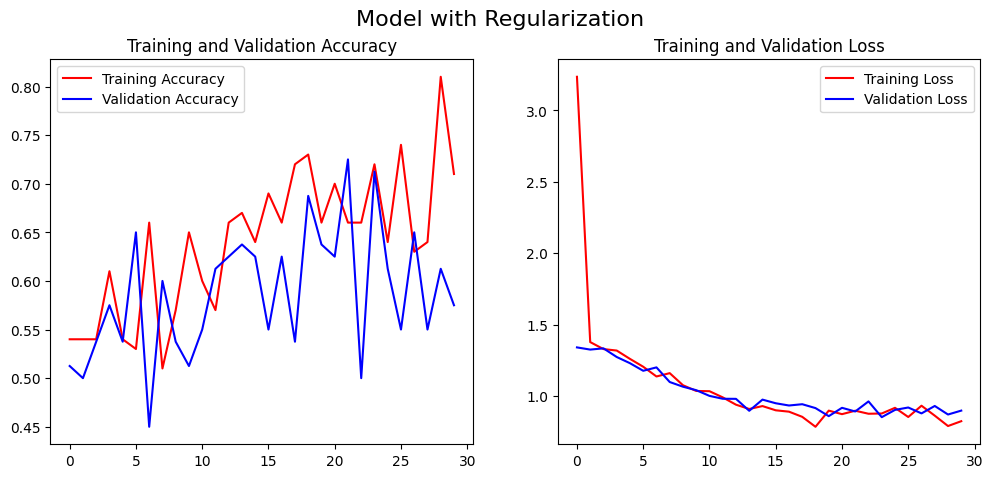

In [4]:
# Regularization

# A Model Prone to Overfitting
# A slightly more complex model that can easily overfit our small dataset.
overfit_model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

overfit_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

print("\n--- Training a model WITHOUT regularization (prone to overfitting) ---")
history_overfit = overfit_model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=30, # Longer training to show overfitting
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
plot_history(history_overfit, "Overfitting Model (No Regularization)")

# Same Model with Regularization
regularized_model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # L2 Regularization
    Dropout(0.5), # Dropout Layer
    Dense(1, activation='sigmoid')
])

regularized_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

print("\n--- Training the same model WITH L2 and Dropout Regularization ---")
history_regularized = regularized_model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
plot_history(history_regularized, "Model with Regularization")


--- Training a custom CNN with RMSprop ---
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.5358 - loss: 0.7517 - val_accuracy: 0.3750 - val_loss: 0.7742
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4132 - loss: 0.7348 - val_accuracy: 0.5500 - val_loss: 0.6836
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5401 - loss: 0.6916 - val_accuracy: 0.4875 - val_loss: 0.6924
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4742 - loss: 0.6950 - val_accuracy: 0.5125 - val_loss: 0.6952
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4672 - loss: 0.7082 - val_accuracy: 0.5125 - val_loss: 0.6954
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4403 - loss: 0.7012 - val_accuracy: 0.5875 - val_loss: 0.6889
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4588 - loss: 0.6936 - val_accuracy: 0.4875 - val_loss: 0.6922
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4321 - loss: 0.70

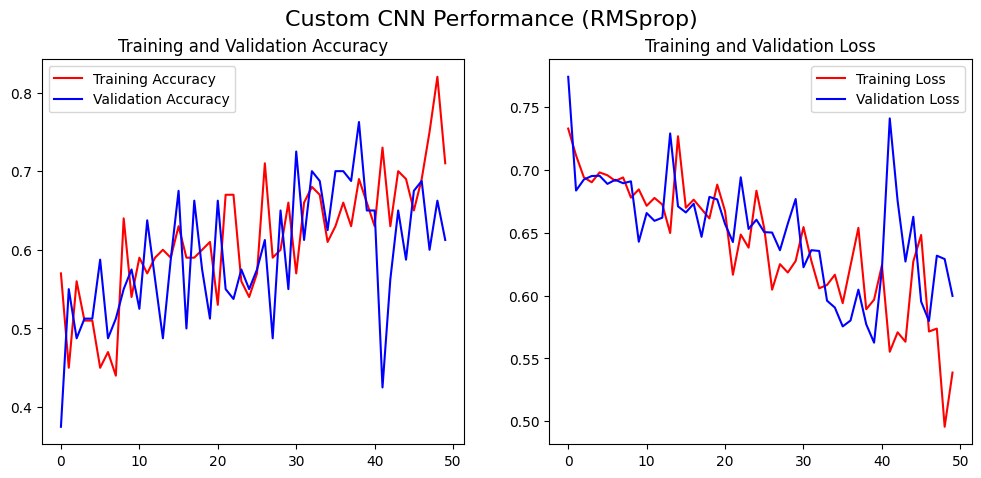

In [7]:
# Custom CNN with RMSprop

custom_cnn = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

custom_cnn.compile(optimizer=RMSprop(learning_rate=0.0002),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print("\n--- Training a custom CNN with RMSprop ---")
history_custom_rms = custom_cnn.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
plot_history(history_custom_rms, "Custom CNN Performance (RMSprop)")


--- Training with VGG16 (Transfer Learning) ---
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.5426 - loss: 0.7096 - val_accuracy: 0.6500 - val_loss: 0.5907
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.4942 - loss: 0.7025 - val_accuracy: 0.5875 - val_loss: 0.6483
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7106 - loss: 0.5367 - val_accuracy: 0.7000 - val_loss: 0.5453
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7567 - loss: 0.5111 - val_accuracy: 0.7750 - val_loss: 0.4764
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7332 - loss: 0.5151 - val_accuracy: 0.8250 - val_loss: 0.4019
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8368 - loss: 0.4548 - val_accuracy: 0.8125 - val_loss: 0.4273
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8497 - loss: 0.4354 - val_accuracy: 0.7875 - val_loss: 0.4331
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7715 

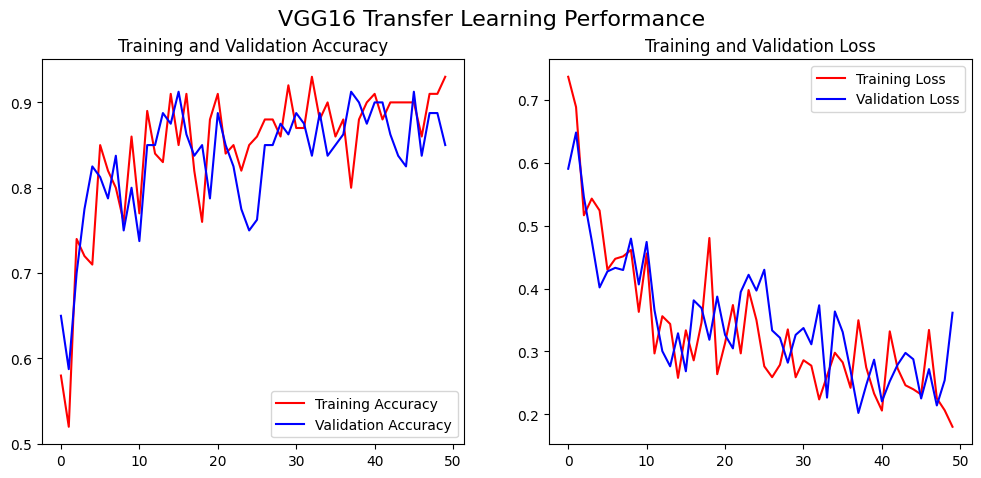


--- Training with ResNet152 (Transfer Learning) ---
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5539 - loss: 0.8743 - val_accuracy: 0.4250 - val_loss: 1.0505
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4876 - loss: 0.8473 - val_accuracy: 0.4625 - val_loss: 0.8616
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.4171 - loss: 0.8150 - val_accuracy: 0.4750 - val_loss: 0.9323
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.5342 - loss: 0.8367 - val_accuracy: 0.5125 - val_loss: 0.6829
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.5178 - loss: 0.7090 - val_accuracy: 0.5000 - val_loss: 0.8811
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.4606 - loss: 0.8430 - val_accuracy: 0.5250 - val_loss: 0.7625
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.4513 - loss: 0.8347 - val_accuracy: 0.5750 - val_loss: 0.6932
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.510

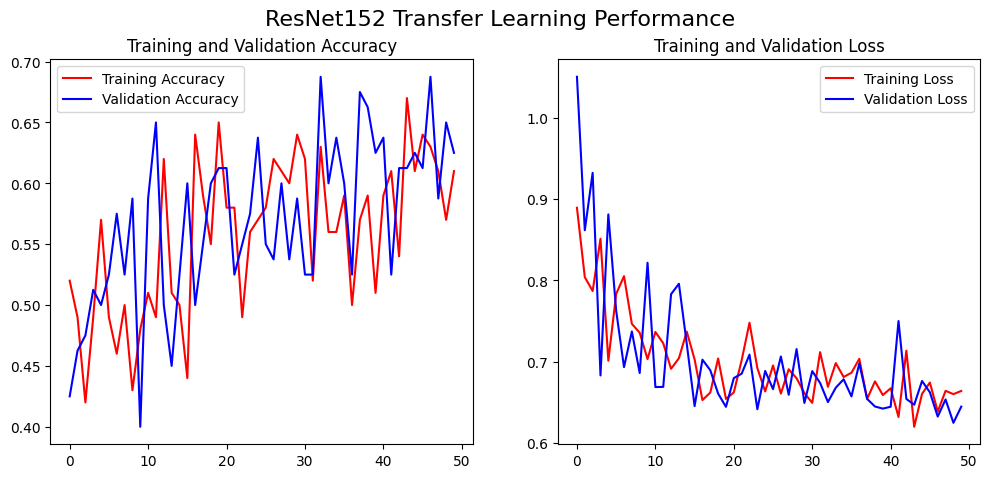

In [ ]:
# Pre-trained Models

# Using VGG16-
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_vgg16.trainable = False

# Custom Classifier
x = base_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions_vgg16 = Dense(1, activation='sigmoid')(x)

model_vgg16 = Model(inputs=base_vgg16.input, outputs=predictions_vgg16)

model_vgg16.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

print("\n--- Training with VGG16 (Transfer Learning) ---")
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
plot_history(history_vgg16, "VGG16 Transfer Learning Performance")


# Using ResNet152
base_resnet = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base
base_resnet.trainable = False

# Classifier
y = base_resnet.output
y = GlobalAveragePooling2D()(y)
y = Dense(512, activation='relu')(y)
predictions_resnet = Dense(1, activation='sigmoid')(y)

model_resnet = Model(inputs=base_resnet.input, outputs=predictions_resnet)

model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("\n--- Training with ResNet152 (Transfer Learning) ---")
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1
)
plot_history(history_resnet, "ResNet152 Transfer Learning Performance")